In [0]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np 

Lbar = np.zeros((15,15))
def petunjuk_jalan(baris,kolom):
    arah = ['A','B','Ki','Ka']
    if (baris == 0):
        arah.remove('A')
    if (baris == len(Lbar)-1):
        arah.remove('B')
    if (kolom == 0):
        arah.remove('Ki')
    if (kolom == len(Lbar)-1):
        arah.remove('Ka')

    return arah
#syarat untuk menentukan posisi
def langkah_lanjut(baris,kolom, arah):
    if (arah == 'A'):
        baris = baris - 1
    if (arah == 'Ka'):
        kolom = kolom + 1
    if (arah == 'B'):
        baris= baris + 1
    if (arah == 'Ki'):
        kolom = kolom - 1

    return [baris, kolom]

In [29]:
import io
from google.colab import files
uploaded = files.upload()

Saving DataTugas3ML2019.txt to DataTugas3ML2019.txt


In [0]:
Ldata =  np.genfromtxt(io.BytesIO(uploaded['DataTugas3ML2019.txt']))

In [0]:
Ome = 1
x   = 1
done = [0,14]

#Rumus yang digunakan untuk menentukan langkah terbaik
def data(start):
    return random.choice(petunjuk_jalan(start[0],start[1])) 

def state(langkah,i):
    return langkah_lanjut(langkah[0],langkah[1],i)

def jState(start,BM):
    return langkah_lanjut(start[0],start[1],BM)
#Sampai di sini

In [0]:
for n in range(100):
    start = [14,0]
    while start != done :
        dat = data(start)
        langkah = langkah_lanjut(start[0],start[1],dat)
        has = Ldata[langkah[0], langkah[1]]
        jb = []
        for i in petunjuk_jalan(langkah[0],langkah[1]):
            stt = state(langkah,i)
            jb.append(Lbar[stt[0],stt[1]])
        Lbar[langkah[0],langkah[1]] = Lbar[langkah[0],langkah[1]] + Ome * (has+( x * max(jb))- Lbar[langkah[0],langkah[1]])
        start = [langkah[0],langkah[1]]

[[418157. 418157. 418159. 418161. 418162. 416676. 418166. 418171. 418171.
  418175. 418177. 418180. 419186. 419191. 419693.]
 [418158. 418159. 418162. 418163. 418165. 418169. 418165. 418172. 418172.
  418177. 418178. 418182. 419189. 419191. 419193.]
 [418157. 418161. 418163. 418164. 418168. 418170. 418171. 418173. 418177.
  418179. 418182. 418186. 419187. 419187. 419189.]
 [418155. 418159. 418160. 418164. 418165. 418168. 418168. 418171. 418173.
  418178. 418180. 418184. 419185. 419183. 419187.]
 [418155. 418159. 418161. 418163. 418166. 418168. 418171. 418172. 418173.
  418177. 418179. 418181. 418181. 418183. 418185.]
 [418154. 418157. 418160. 418161. 418164. 418166. 418169. 418173. 418175.
  418177. 418178. 418179. 418181. 418182. 418184.]
 [418158. 418160. 418163. 418165. 418166. 418167. 418170. 418172. 418171.
  418174. 418177. 418178. 418179. 418179. 418181.]
 [416663. 418161. 418162. 418161. 418162. 418166. 418169. 418170. 418172.
  418175. 418176. 418174. 418175. 418176. 418178.]


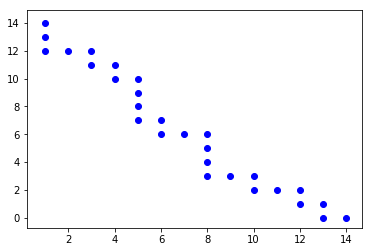

In [34]:
print(Lbar)   
angk = []
tot = []
start = [14,0]

while start != done:
    listD = {}
    bergerak = petunjuk_jalan(start[0], start[1])
    for i in bergerak :
        State = langkah_lanjut(start[0],start[1],i)
        listD[i] = Lbar[State[0],State[1]]
    BM = max(listD, key=listD.get)
    tstate = jState(start,BM)
    angk.append(Ldata[tstate[0],tstate[1]])
    tot.append(Lbar[tstate[0],tstate[1]])
    plt.scatter(x=start[0], y=start[1], c = 'b')
    start = [tstate[0], tstate[1]]

In [19]:
print(sum(tot))
print(sum(angk))
plt.show()

2765074.0
451.0
